# 신용카드 사용자 연체 예측

## Train data 변수 설명 

* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류
  * Commercial_associate 사업
  * Working 일
  * State servant 공무원
  * Pensioner 연금 수령자
  * Student 학생

* edu_type: 교육 수준

  * Higher education : 고등학교 졸업자 
  * Secondary / secondary special : 중학교 졸업자
  * Incomplete higher
  * Lower secondary
  * Academic degree : 학위소지자

* family_type: 결혼 여부
  * Married 결혼
  * Civil marriage 자녀가 있는 결혼
  * Separated 이혼
  * Single / not married 싱글
  * Widow 한부모 가정
  
* house_type: 생활 방식
  * Municipal apartment
  * House / apartment
  * With parents
  * Co-op apartment
  * Rented apartment
  * Office apartment

* DAYS_BIRTH: 출생일

  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

* DAYS_EMPLOYED: 업무 시작일
  
  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
  
  양수 값은 고용되지 않은 상태를 의미함

* FLAG_MOBIL: 핸드폰 소유 여부

* work_phone: 업무용 전화 소유 여부

* phone: 전화 소유 여부

* email: 이메일 소유 여부

* occyp_type: 직업 유형													

* family_size: 가족 규모

* begin_month: 신용카드 발급 월

  데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

* credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

## 데이터 불러오기 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set(font_scale=1)
sns.set_palette("pastel")

data = pd.read_csv("/content/drive/MyDrive/DuSiData/credit_card/train.csv")

data.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [18]:
data.isnull().sum()/data.shape[0]*100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
age               0.000000
work_period       0.000000
dtype: float64

## feature engineering

> 출생일과 업무 시작일은 데이터가 수집된 날을 기준으로 -(날짜)로 표기되어 있음. `age`, `work_period` 두개의 새로운 변수를 생성해 알아보기 쉽게 년(year)으로 변경 
> 
> 신용카드 발급 월도 음수로 되어 있으므로 절대값 붙이기 

In [3]:
data['age']=abs(data['DAYS_BIRTH']/365.5).astype(int)
data['work_period']=abs(data['DAYS_EMPLOYED']/365).astype(int)
data['begin_month']=abs(data['begin_month'])

train = data.drop(['DAYS_EMPLOYED','DAYS_BIRTH'], axis=1)

train.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age,work_period
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,1,0,0,0,NaN,2.0,6.0,1.0,38,12
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,1,Laborers,3.0,5.0,1.0,31,4


## Binary 

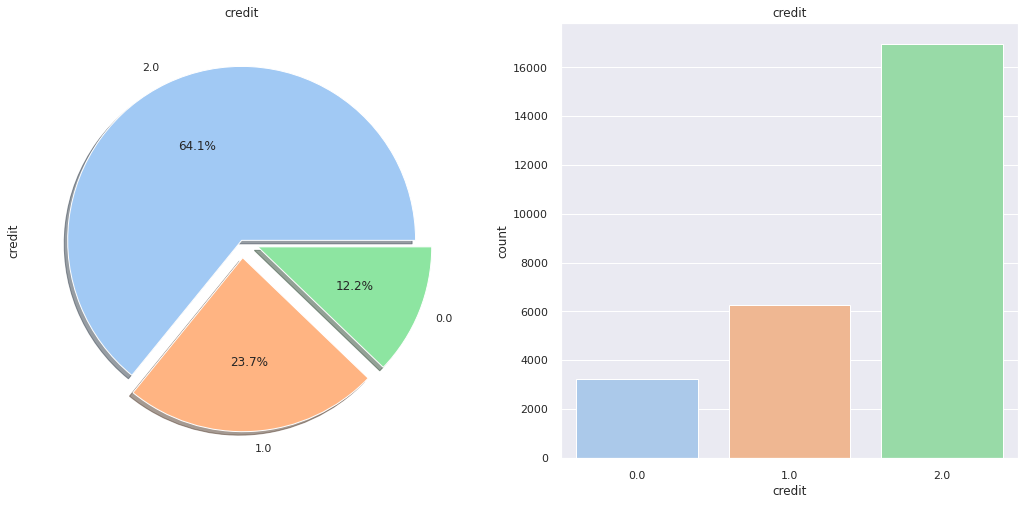

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit',data=data,ax=ax[1])
ax[1].set_title('credit')
plt.show()

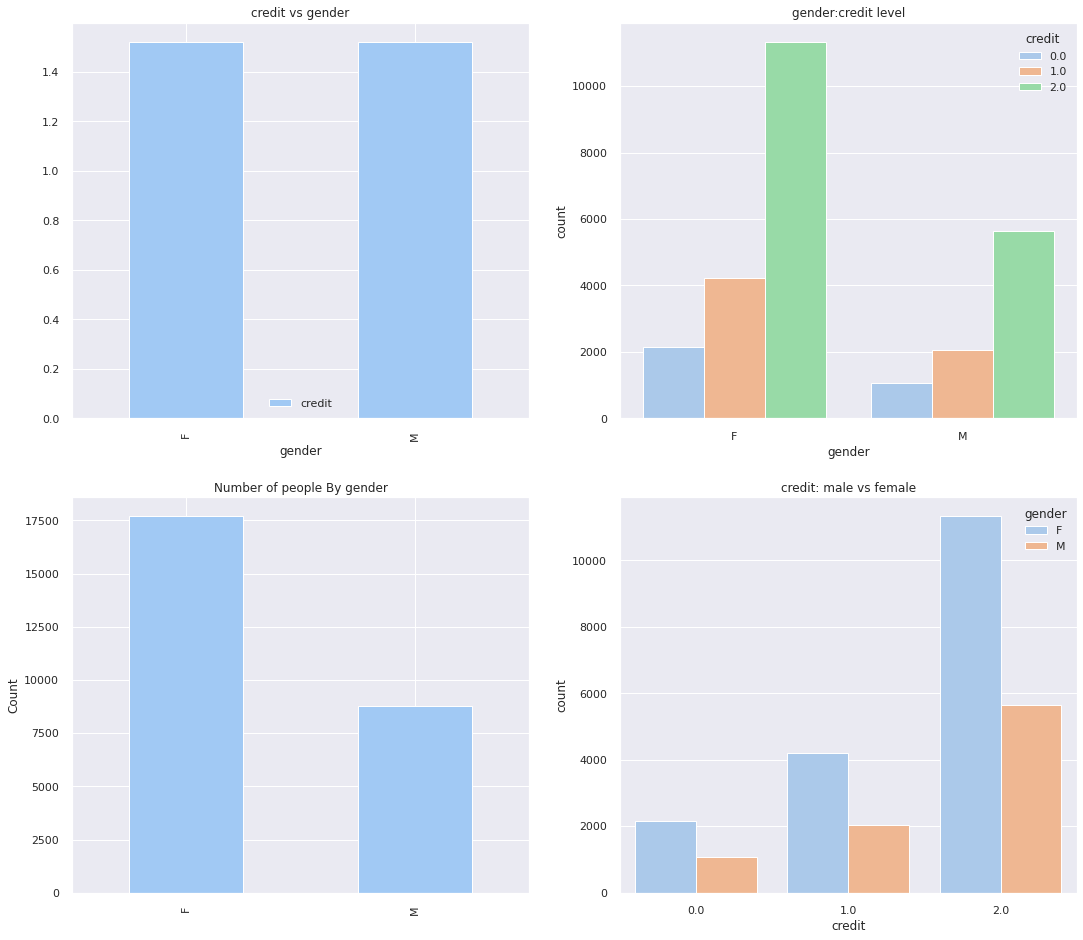

In [20]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['gender','credit']].groupby(['gender']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs gender')
sns.countplot('gender',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('gender:credit level')

data['gender'].value_counts().plot.bar(ax=ax[1,0])
ax[1,0].set_title('Number of people By gender')
ax[1,0].set_ylabel('Count')
sns.countplot('credit',hue='gender',data=data,ax=ax[1,1])
ax[1,1].set_title('credit: male vs female')
plt.show()

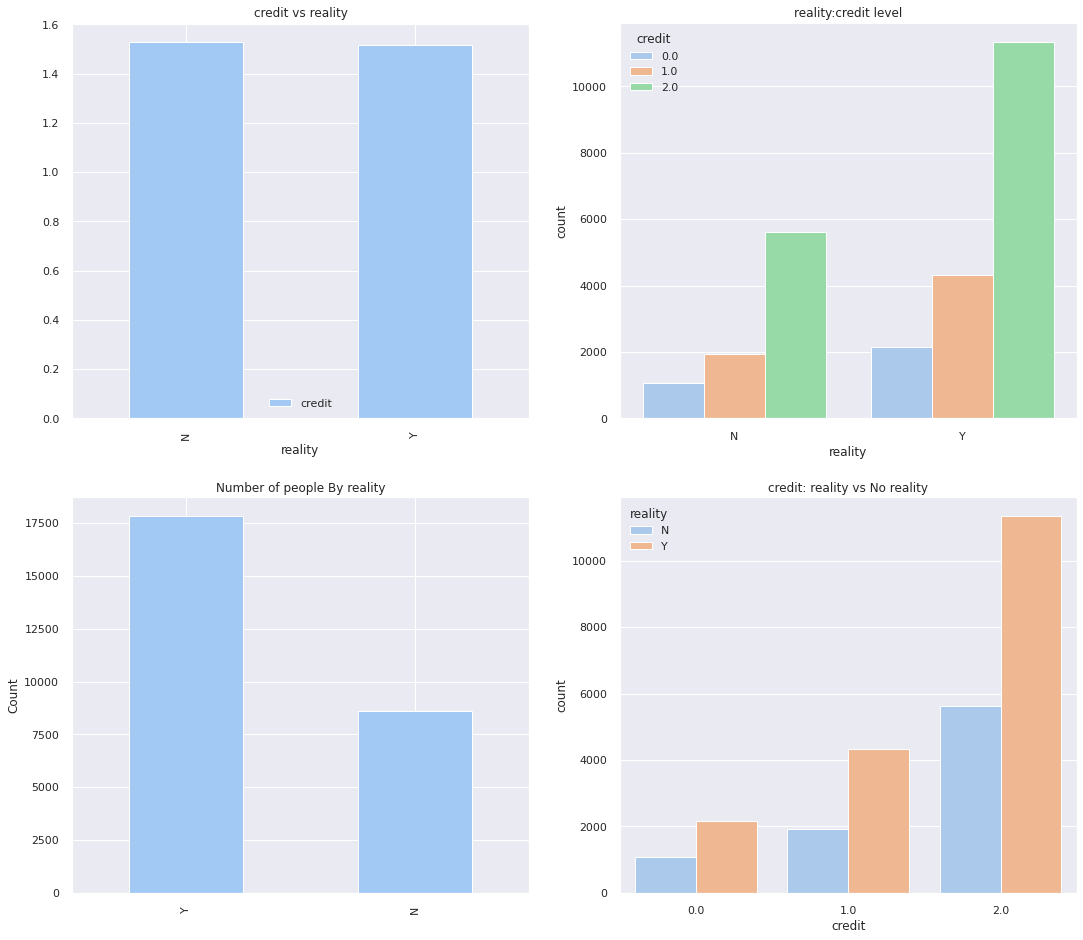

In [22]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['reality','credit']].groupby(['reality']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs reality')
sns.countplot('reality',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('reality:credit level')
data['reality'].value_counts().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Number of people By reality')
ax[1, 0].set_ylabel('Count')
sns.countplot('credit',hue='reality',data=data,ax=ax[1, 1])
ax[1, 1].set_title('credit: reality vs No reality')
plt.show()

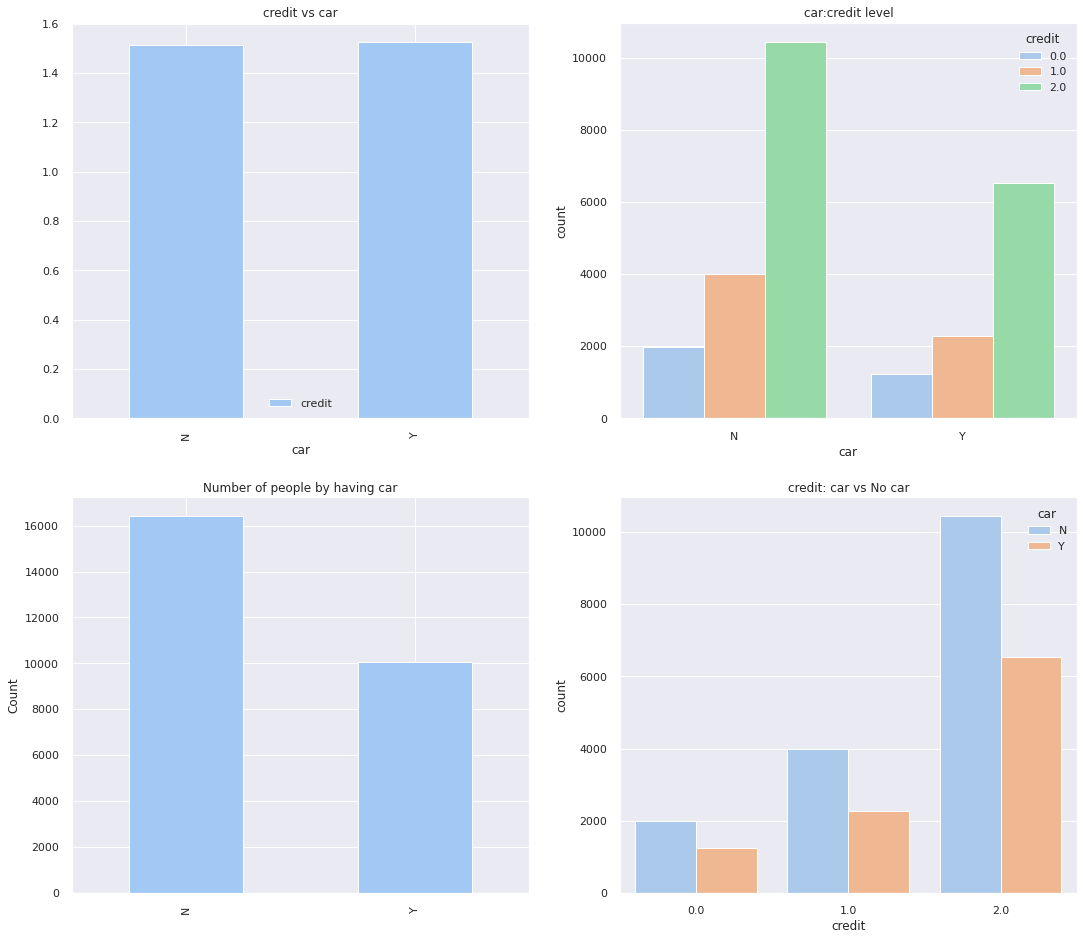

In [21]:
f,ax=plt.subplots(2,2,figsize=(18,16))
data[['car','credit']].groupby(['car']).mean().plot.bar(ax=ax[0,0])
ax[0,0].set_title('credit vs car')
sns.countplot('car',hue='credit',data=data,ax=ax[0,1])
ax[0,1].set_title('car:credit level')
data['car'].value_counts().plot.bar(ax=ax[1, 0])
ax[1, 0].set_title('Number of people by having car')
ax[1, 0].set_ylabel('Count')
sns.countplot('credit',hue='car',data=data,ax=ax[1, 1])
ax[1, 1].set_title('credit: car vs No car')
plt.show()

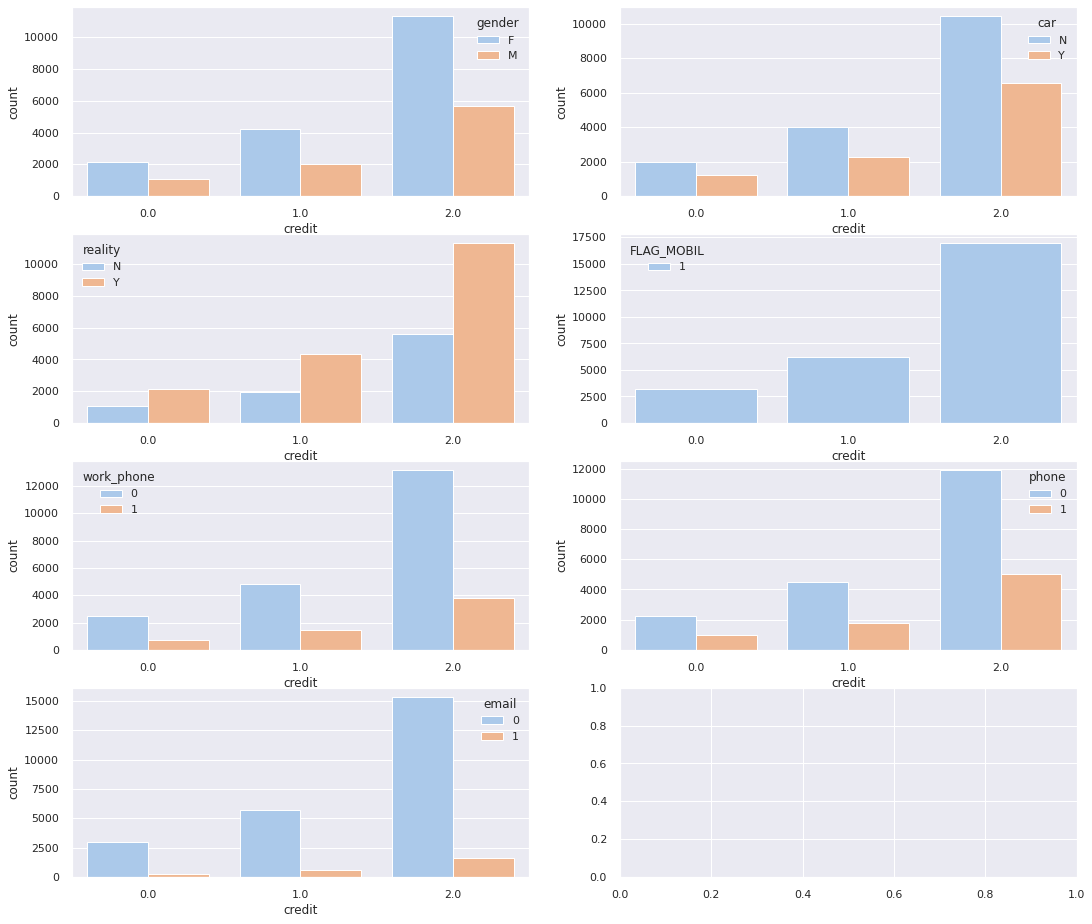

In [4]:
f,ax=plt.subplots(4,2,figsize=(18,16))
sns.countplot('credit',hue='gender',data=data,ax=ax[0,0])
sns.countplot('credit',hue='car',data=data,ax=ax[0,1])
sns.countplot('credit',hue='reality',data=data,ax=ax[1,0])
sns.countplot('credit',hue='FLAG_MOBIL',data=data,ax=ax[1,1])
sns.countplot('credit',hue='work_phone',data=data,ax=ax[2,0])
sns.countplot('credit',hue='phone',data=data,ax=ax[2,1])
sns.countplot('credit',hue='email',data=data,ax=ax[3,0])

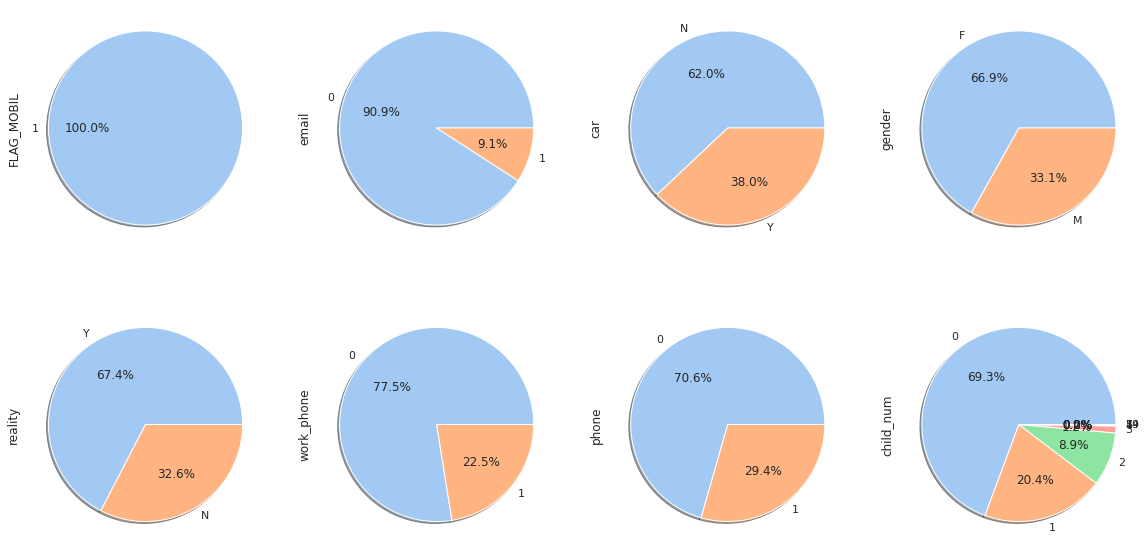

In [5]:
f,ax=plt.subplots(2, 4,figsize=(20, 10))
train['FLAG_MOBIL'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0, 0], shadow=True)

train['email'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0, 1], shadow=True)

train['car'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0, 2], shadow=True)

train['gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0, 3], shadow=True)

train['reality'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1, 0], shadow=True)

train['work_phone'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1, 1], shadow=True)

train['phone'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1, 2], shadow=True)

train['child_num'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1, 3], shadow=True)

* 신용등급에 따른 변수들의 countplot을 보면 `FLAG_MOBIL`은 하나의 값으로 이루어져 있고, `email`은 90%가 하나의 값으로 이루어져 있다. $\Longrightarrow$ **변수를 제거해도 될 것 같음**

## Categorical 


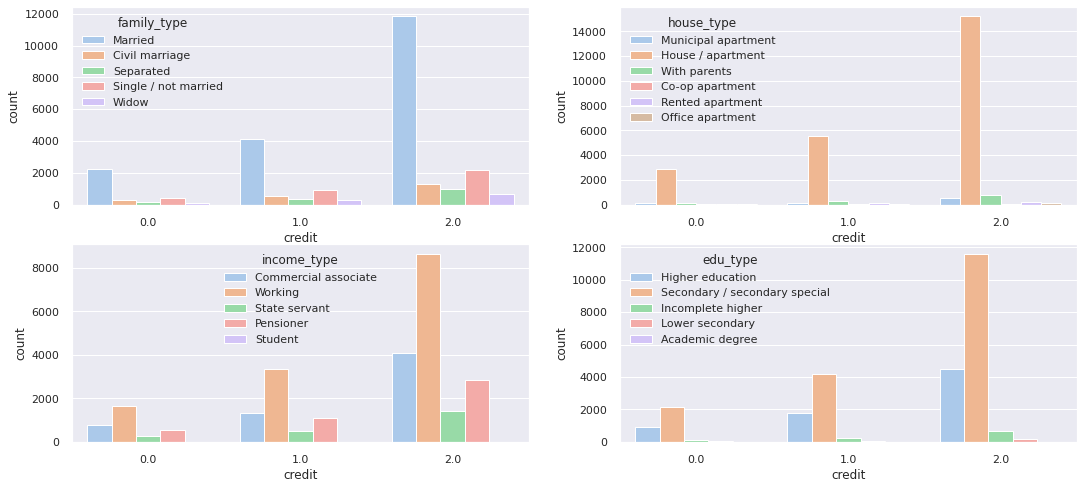

In [6]:
f,ax=plt.subplots(2, 2,figsize=(18,8))
sns.countplot('credit',hue='family_type',data=data,ax=ax[0, 0])
sns.countplot('credit',hue='house_type',data=data,ax=ax[0, 1])
sns.countplot('credit',hue='income_type',data=data,ax=ax[1, 0])
sns.countplot('credit',hue='edu_type',data=data,ax=ax[1, 1])

plt.show()

* `Married`가 모든 등급에서 가장 많은 것을 볼 수 있음. 신혼이나 사실혼 관계의 부부들이 많은 것으로 예상. 
* `Secondary / secondary special` 중등교육을 받은 사람들이 모든 등급에서 가장 많음

In [7]:
import plotly.express as px
fig = px.box(train, x='credit', y='income_total', color='gender')
fig.show()

* 모든 신용등급에서 남성이 여성보다 평균적으로 연간소득이 조금 높았다. 
* 예상외로 가장 낮은 신용등급에서 연간소득이 가장 높은 사람이 있다. $\Longrightarrow$ **소득이 높다고 해서 꼭 신용등급이 높은 것은 아니다.**
* 신용등급이 낮을 수록 이상치의 범위가 넓다.

In [8]:
Flag_mobil = train.groupby('FLAG_MOBIL')['index'].count()
Flag_mobil

FLAG_MOBIL
1    26457
Name: index, dtype: int64

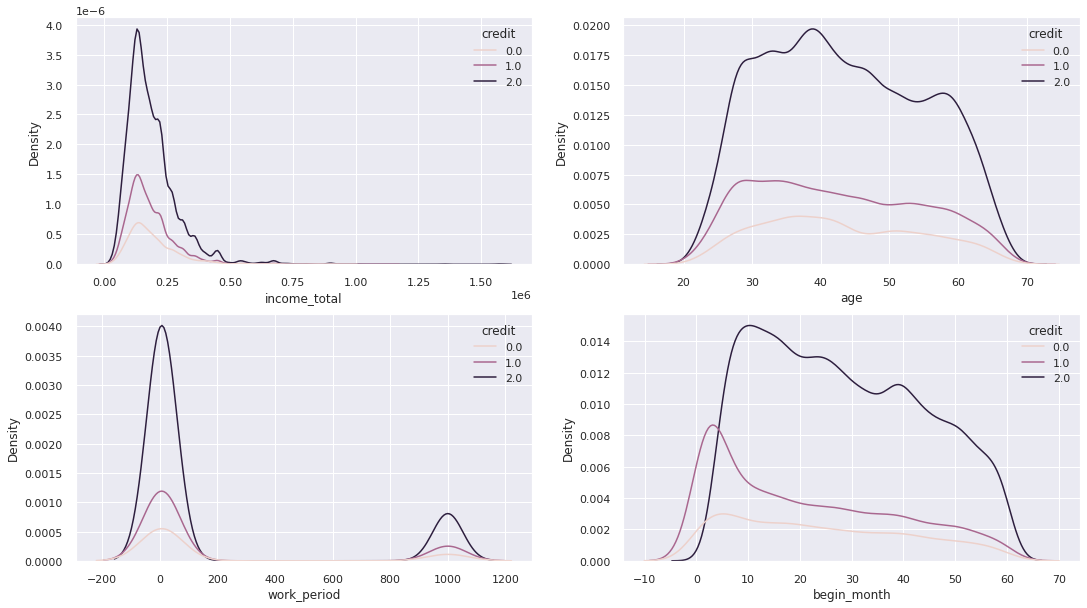

In [9]:
f,ax=plt.subplots(2,2,figsize=(18,10))
sns.kdeplot(data=train, x='income_total',hue='credit',ax=ax[0,0])
sns.kdeplot(data=train, x='age',hue='credit',ax=ax[0,1])
sns.kdeplot(data=train, x='work_period',hue='credit',ax=ax[1,0])
sns.kdeplot(data=train, x='begin_month',hue='credit',ax=ax[1,1])


* 등급 보두 비슷한 분포를 보이지만 `begin_month`의 경우 조금 다른 분포를 보이고 있다. 
* 


In [10]:
train_0 = train[train['credit']==0.0]
train_1 = train[train['credit']==1.0]
train_2 = train[train['credit']==2.0]

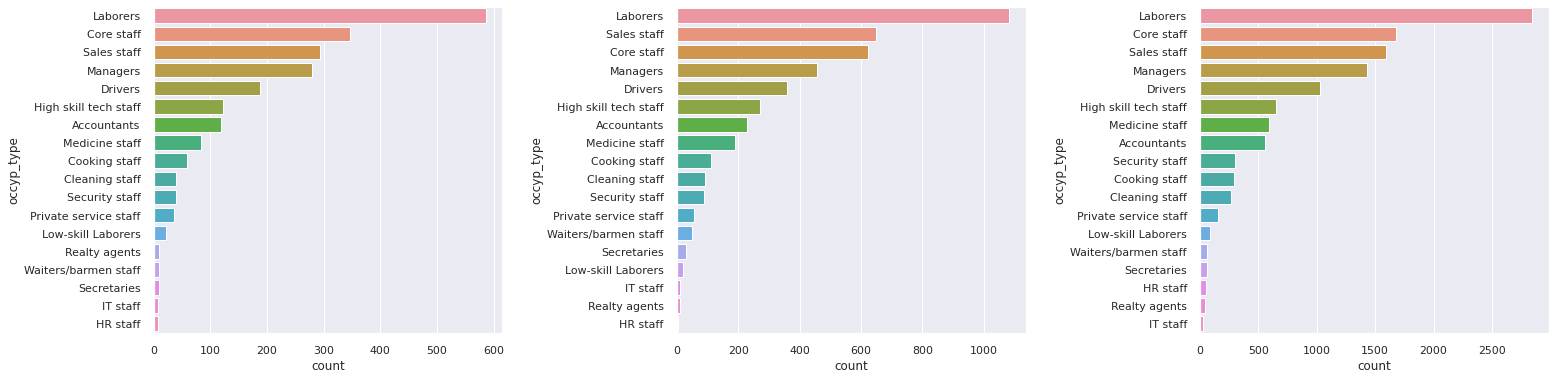

In [11]:
f, ax = plt.subplots(1, 3, figsize=(25, 6))
sns.countplot(y = 'occyp_type', data = train_0, order = train_0['occyp_type'].value_counts().index, ax=ax[0])
sns.countplot(y = 'occyp_type', data = train_1, order = train_1['occyp_type'].value_counts().index, ax=ax[1])
sns.countplot(y = 'occyp_type', data = train_2, order = train_2['occyp_type'].value_counts().index, ax=ax[2])
plt.subplots_adjust(wspace=0.5, hspace=0.3)
plt.show()

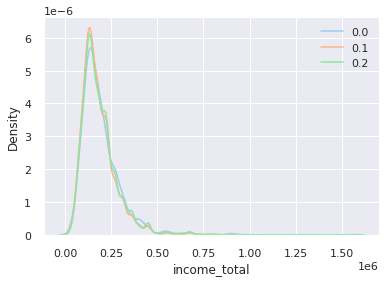

In [12]:
sns.distplot(train_0['income_total'],label='0.0', hist=False)
sns.distplot(train_1['income_total'],label='0.1', hist=False)
sns.distplot(train_2['income_total'],label='0.2', hist=False)
plt.legend()

In [13]:
def num_plot(column):
  
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))


  sns.distplot(train_0[column],
                ax = axes[0])
  axes[0].tick_params(labelsize=12)
  axes[0].set_title('credit = 0')
  axes[0].set_ylabel('count')

  sns.distplot(train_1[column],
                ax = axes[1])
  axes[1].tick_params(labelsize=12)
  axes[1].set_title('credit = 1')
  axes[1].set_ylabel('count')

  sns.distplot(train_2[column],
                ax = axes[2])
  axes[2].tick_params(labelsize=12)
  axes[2].set_title('credit = 2')
  axes[2].set_ylabel('count')
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

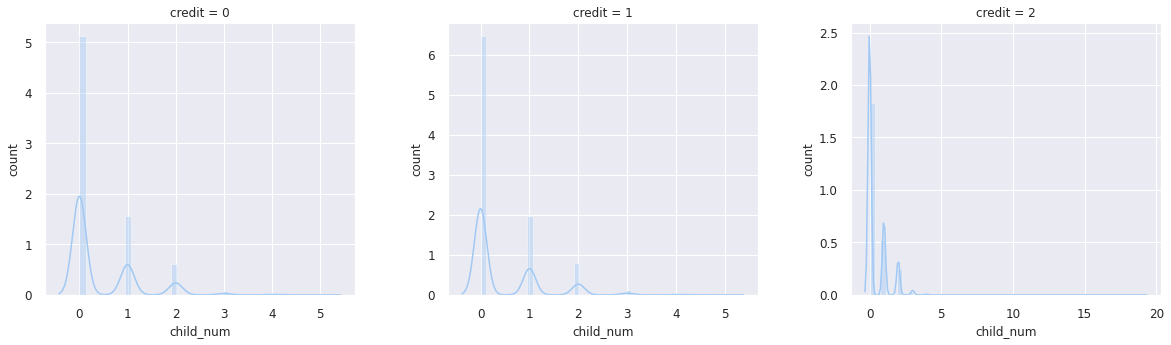

In [14]:
num_plot("child_num")

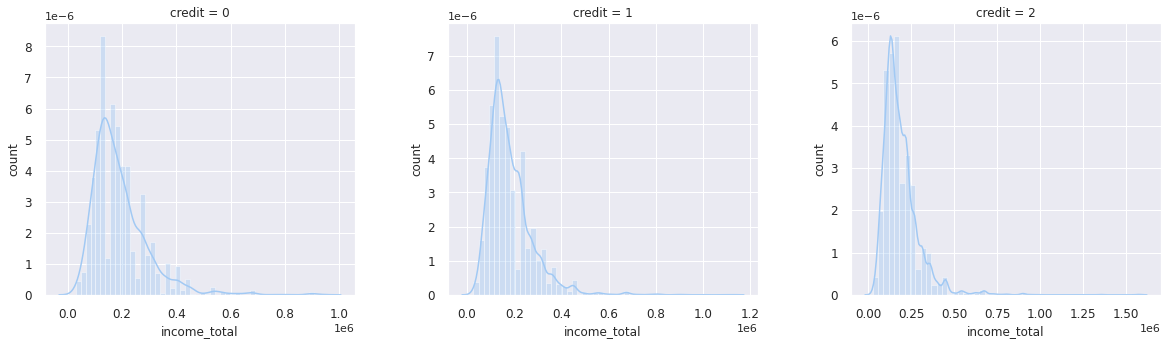

In [15]:
num_plot("income_total")

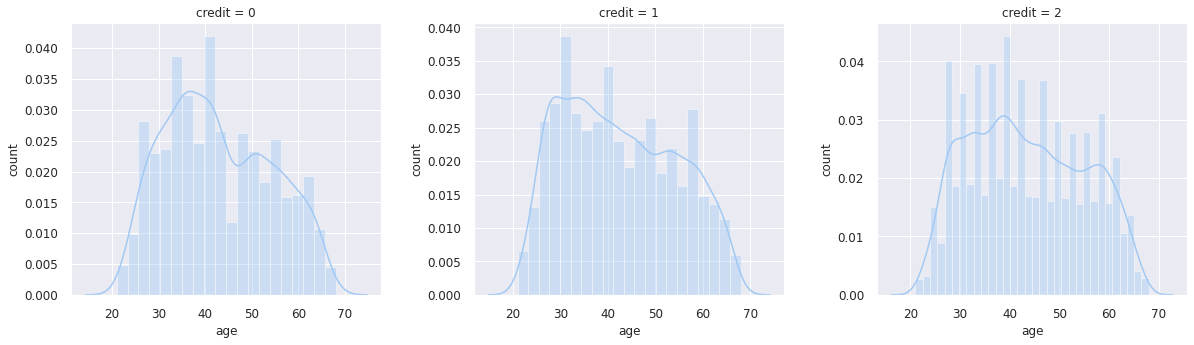

In [16]:
num_plot("age")

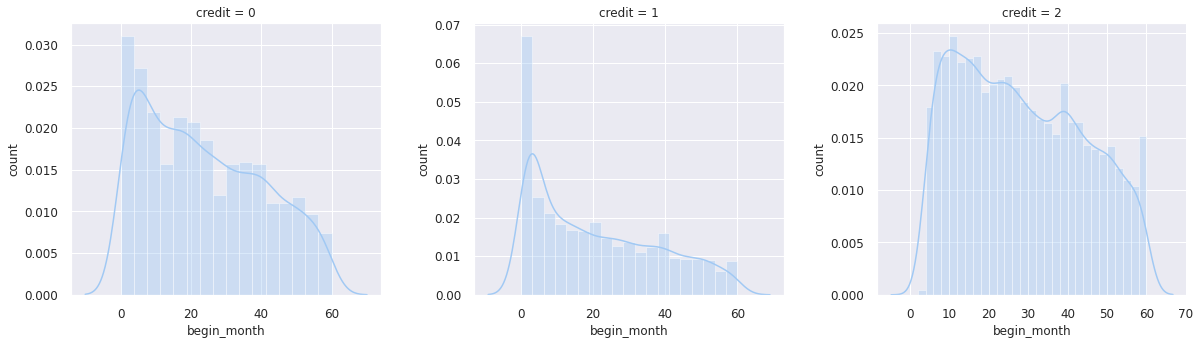

In [17]:
num_plot("begin_month")